# House Price Predictor Model

## Objective: 
Build a House Price Prediciton Model For Houses in Karachi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'Entities.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [3]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [4]:
cols_to_keep = [ 'property_type',
       'price', 'location', 'city', 'province_name',
       'baths', 'purpose', 'bedrooms', 
       'Total_Area']

df = df[cols_to_keep]
df.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,For Sale,2,1089.004
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,15246.056
2,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,2178.008
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,10890.000
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,2178.008


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   location       168446 non-null  object 
 3   city           168446 non-null  object 
 4   province_name  168446 non-null  object 
 5   baths          168446 non-null  int64  
 6   purpose        168446 non-null  object 
 7   bedrooms       168446 non-null  int64  
 8   Total_Area     168446 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 11.6+ MB


In [6]:
df.province_name.unique()

array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object)

In [7]:
df.city.unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [8]:
# since we have to make it for Karachi only. Subsetting df

df = df[df['city'] == 'Karachi']
df.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
156,House,450000000,Cantt,Karachi,Sindh,7,For Sale,6,21780.000
157,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,8,For Sale,6,4356.016
158,Flat,21000000,DHA Defence,Karachi,Sindh,3,For Sale,3,24230.339
159,House,6500000,Malir,Karachi,Sindh,1,For Sale,2,8712.032
160,House,13000000,Gadap Town,Karachi,Sindh,4,For Sale,4,26136.096


In [9]:
df.property_type.unique()

array(['House', 'Flat', 'Room', 'Lower Portion', 'Upper Portion',
       'Penthouse', 'Farm House'], dtype=object)

In [10]:
# keeping the model genereic. removin penthhouse and farm house
property_to_rem = ['Penthouse','Farm House','Room']
bool_mask = df['property_type'].isin(property_to_rem)
df = df[~(bool_mask)]
df.property_type.unique()

array(['House', 'Flat', 'Lower Portion', 'Upper Portion'], dtype=object)

In [11]:
# removing extra col like city and province_name since like we are only targeting karachi
cols_to_rem = ['city','province_name']
df.drop(columns=cols_to_rem,inplace = True)

data cleaning

In [12]:
df1 = df.copy()

In [13]:
df1.isna().sum()

property_type    0
price            0
location         0
baths            0
purpose          0
bedrooms         0
Total_Area       0
dtype: int64

In [14]:
df1.rename(columns={'Total_Area':'area'},inplace=True)

In [15]:
df1 = df1[['property_type',  'location', 'baths', 'purpose', 'bedrooms',
       'area','price']]

In [16]:
df2 = df1.copy()
df2 = df2[df2['purpose']=='For Sale']
df2.drop(columns=['purpose'],inplace=True)
df2.head(1)

,property_type,location,baths,bedrooms,area,price
156,House,Cantt,7,6,21780.0,450000000


In [17]:
df2['price'] = df2['price']/1e6 #in 10THlakhs unit
df2.head(1)

,property_type,location,baths,bedrooms,area,price
156,House,Cantt,7,6,21780.0,450.0


### Removing Outliers

In [18]:
df2['baths'].describe() ,  df2.bedrooms.describe()

(count    46353.000000
 mean         2.619507
 std          1.960773
 min          0.000000
 25%          2.000000
 50%          3.000000
 75%          3.000000
 max         13.000000
 Name: baths, dtype: float64,
 count    46353.000000
 mean         3.073997
 std          1.809227
 min          0.000000
 25%          2.000000
 50%          3.000000
 75%          4.000000
 max         16.000000
 Name: bedrooms, dtype: float64)

In [19]:
df2 = df2[~((df2['baths']==0) | (df2['bedrooms'] == 0))]

In [20]:
df3 = df2.copy()

df3[df3['baths'] > df3['bedrooms']+1].head(), df2.shape

(    property_type              location  baths  bedrooms       area  price
 157         House     Gulistan-e-Jauhar      8         6   4356.016   35.0
 351         House  Gulshan-e-Iqbal Town      6         4  16335.000  250.0
 517          Flat               Clifton      5         3  28041.853   48.0
 518          Flat               Clifton      5         3  28041.853   50.0
 704          Flat           Bath Island      5         3  28041.853   50.0,
 (36089, 6))

In [21]:
df3 = df3[~(df3['baths'] > df3['bedrooms']+1)]

df3 = df3[df3['bedrooms'] <= df3['baths'] + 1]

print(df3.head())
df3.shape

    property_type     location  baths  bedrooms       area  price
156         House        Cantt      7         6  21780.000  450.0
158          Flat  DHA Defence      3         3  24230.339   21.0
159         House        Malir      1         2   8712.032    6.5
160         House   Gadap Town      4         4  26136.096   13.0
161         House  DHA Defence      4         4   1089.004   32.0


(34035, 6)

In [22]:
df3['area'].describe()

count     34035.000000
mean      12455.505313
std       16234.945037
min           0.000000
25%        2722.510000
50%       10890.000000
75%       15246.056000
max      952875.000000
Name: area, dtype: float64

<Axes: xlabel='area', ylabel='Density'>

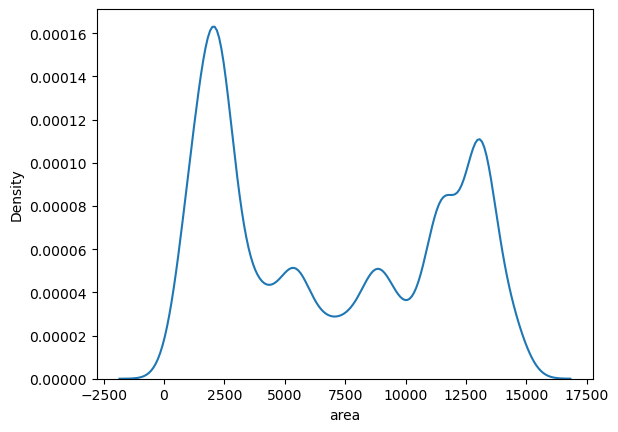

In [23]:
sns.kdeplot(df3[df3['area']<df3['area'].quantile(0.75)]['area'])

<Axes: xlabel='area', ylabel='Density'>

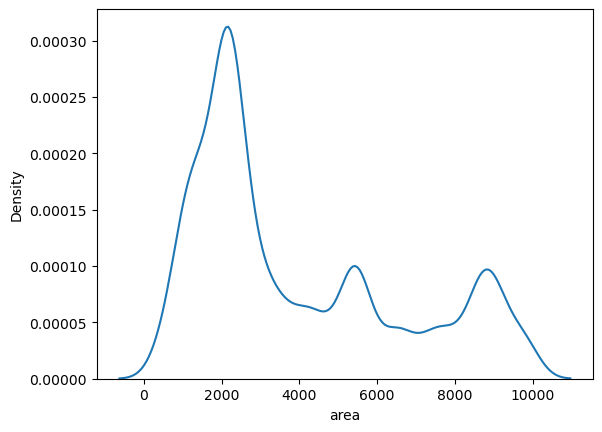

In [24]:
df4 = df3.copy()
df4 = df4[(df4['area'] >= 500) & (df4['area'] <= df4['area'].quantile(0.75))]
df4 = df4[df4['area']<10000]

sns.kdeplot(df4['area'])

In [25]:
df4['price_per_sqft'] = df4['price']*1e6/df4['area']
df4.head()

,property_type,location,baths,bedrooms,area,price,price_per_sqft
159,House,Malir,1,2,8712.032,6.5,746.094597
161,House,DHA Defence,4,4,1089.004,32.0,29384.648725
164,House,DHA Defence,6,6,5445.000,110.0,20202.020202
175,Flat,Abul Hassan Isphani Road,2,2,8712.032,4.1,470.613515
180,House,Malir,5,5,3811.514,59.5,15610.594635


In [26]:
q1 = df4['price_per_sqft'].quantile(0.25)
q3 = df4['price_per_sqft'].quantile(0.75)

iqr = q3-q1

lb = q1 - 1.5*(iqr)
ub = q3 + 1.5*iqr

lb,ub

(-12220.55992114229, 23126.584642313697)

In [27]:
tempdf = df4[(df4['property_type'] == 'House') & (df4['location'] == 'Gadap Town')]
tempdf.head()

,property_type,location,baths,bedrooms,area,price,price_per_sqft
710,House,Gadap Town,3,4,7623.028,3.2,419.780696
1443,House,Gadap Town,3,3,9256.534,4.0,432.127187
2331,House,Gadap Town,5,4,2722.510,18.0,6611.545963
3780,House,Gadap Town,4,4,2178.008,12.5,5739.189204
3866,House,Gadap Town,3,2,1361.255,5.9,4334.235687


In [28]:
# tempdf.loc[:, 'price'] = tempdf['price'] * 1e6

<Axes: xlabel='area', ylabel='price'>

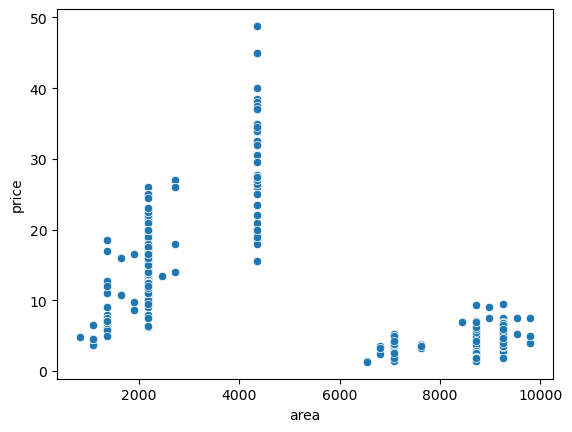

In [29]:
sns.scatterplot(data=tempdf,x='area',y='price')

In [30]:
tempdf[tempdf['price']==1.3]

,property_type,location,baths,bedrooms,area,price,price_per_sqft
52565,House,Gadap Town,2,2,6534.024,1.3,198.958559


In [41]:
df5= df4.copy()
df5.drop(columns=['price_per_sqft'],inplace=True)

In [42]:
df5.columns

Index(['property_type', 'location', 'baths', 'bedrooms', 'area', 'price'], dtype='object')

In [43]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
df5_encoded = pd.get_dummies(df5, columns=['property_type', 'location'])

# Define feature matrix X and target vector y
X = df5_encoded.drop(columns=['price'])  # Drop the 'price' column to get features
y = df5_encoded['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 122.47
R^2 Score: 0.86


In [45]:
len(X_test) , len(y_test) , len(y_pred)

(4948, 4948, 4948)

In [46]:
len(X_test['area'])

4948

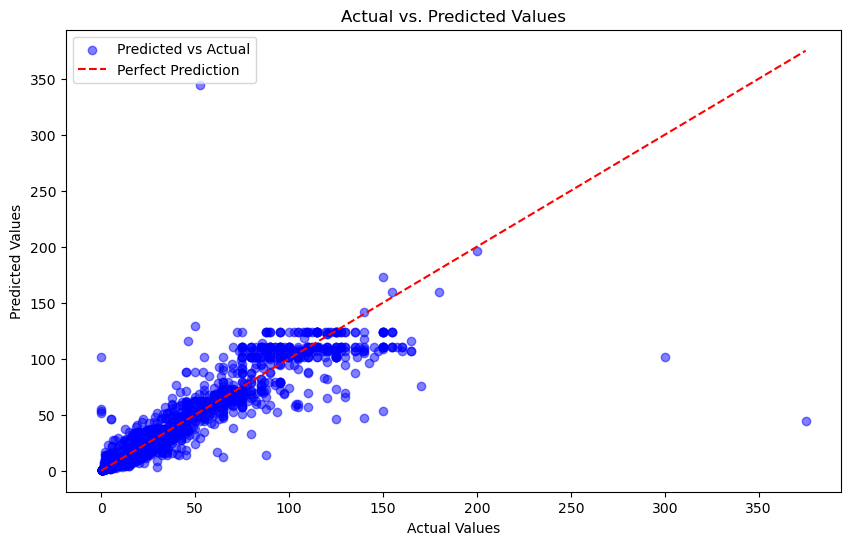

In [47]:
# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, label='Predicted vs Actual', color='blue', alpha=0.5)

# Plot a reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Show the plot
plt.show()


In [49]:
import pickle

with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)